In [1]:
from azure.core.credentials import AzureKeyCredential
from azure.ai.formrecognizer import FormRecognizerClient
from PIL import Image, ImageDraw
from io import BytesIO
from azure.keyvault.secrets import SecretClient
from azure.identity import DefaultAzureCredential
import matplotlib.pyplot as plt

## Authentication
Don't forget to `az login` in cmd!

In [2]:
keyVaultName = "cvprojectkeyvault"
KVUri = f"https://{keyVaultName}.vault.azure.net"

credential = DefaultAzureCredential()
client = SecretClient(vault_url=KVUri, credential=credential)

In [3]:
AZURE_FORM_RECOGNIZER_ENDPOINT = "https://cvprojectformrecognizer.cognitiveservices.azure.com/"
secretName = "formrecognizerkey1"
retrieved_secret = client.get_secret(secretName)

endpoint = AZURE_FORM_RECOGNIZER_ENDPOINT
key = retrieved_secret.value
form_recognizer_client = FormRecognizerClient(endpoint=endpoint, credential=AzureKeyCredential(key))

## Receipt Recognizer

In [4]:
content_url = "https://raw.githubusercontent.com/udacity/cd0461-building-computer-vision-solutions-with-azure-exercises/main/resources/receipt-1.png"
receipt_content_from_url = form_recognizer_client.begin_recognize_receipts_from_url(content_url)

collected_receipts = receipt_content_from_url.result()

In [5]:
collected_receipts

[RecognizedForm(form_type=prebuilt:receipt, fields={'Items': FormField(value_type=list, label_data=None, value_data=None, name=Items, value=[FormField(value_type=dictionary, label_data=None, value_data=None, name=Items, value={'Name': FormField(value_type=string, label_data=None, value_data=FieldData(page_number=1, text=Hotdog, bounding_box=[Point(x=170.0, y=369.0), Point(x=275.0, y=371.0), Point(x=274.0, y=402.0), Point(x=170.0, y=400.0)], field_elements=None), name=Name, value='Hotdog', confidence=0.984), 'TotalPrice': FormField(value_type=float, label_data=None, value_data=FieldData(page_number=1, text=$2.99, bounding_box=[Point(x=462.0, y=371.0), Point(x=550.0, y=372.0), Point(x=550.0, y=397.0), Point(x=463.0, y=396.0)], field_elements=None), name=TotalPrice, value=2.99, confidence=0.986)}, confidence=1.0), FormField(value_type=dictionary, label_data=None, value_data=None, name=Items, value={'Name': FormField(value_type=string, label_data=None, value_data=FieldData(page_number=1, t

## ID Card Recognizer

In [6]:
def show_image_in_cell(img_file):
    #response = requests.get(img_url)
    img = Image.open(img_file)
    plt.figure(figsize=(20,10))
    plt.imshow(img)
    plt.show()

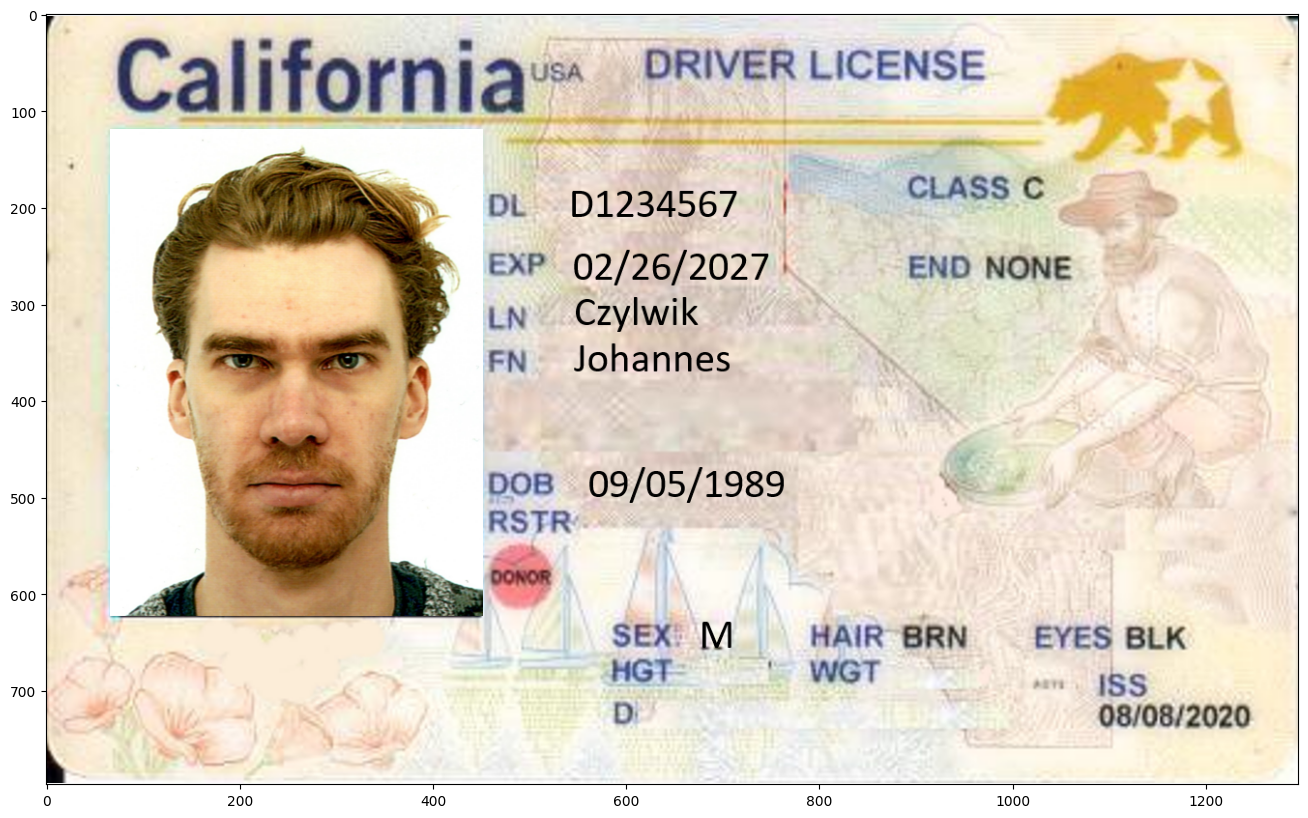

In [7]:
show_image_in_cell("../material_preparation_step/ca-dl-johannes_czylwik.png")

In [8]:
id_content_from_file = form_recognizer_client.begin_recognize_identity_documents(open("../material_preparation_step/ca-dl-johannes_czylwik.png", "rb"), content_type="image/png")

In [9]:
collected_id_cards = id_content_from_file.result()

In [10]:
collected_id_cards

[RecognizedForm(form_type=prebuilt:idDocument:driverLicense, fields={'CountryRegion': FormField(value_type=countryRegion, label_data=None, value_data=None, name=CountryRegion, value='USA', confidence=0.99), 'DateOfBirth': FormField(value_type=date, label_data=None, value_data=FieldData(page_number=1, text=09/05/1989, bounding_box=[Point(x=556.0, y=470.0), Point(x=759.0, y=467.0), Point(x=759.0, y=507.0), Point(x=555.0, y=505.0)], field_elements=None), name=DateOfBirth, value=datetime.date(1989, 9, 5), confidence=0.995), 'DateOfExpiration': FormField(value_type=date, label_data=None, value_data=FieldData(page_number=1, text=02/26/2027, bounding_box=[Point(x=539.0, y=241.0), Point(x=747.0, y=243.0), Point(x=747.0, y=282.0), Point(x=539.0, y=281.0)], field_elements=None), name=DateOfExpiration, value=datetime.date(2027, 2, 26), confidence=0.995), 'DocumentNumber': FormField(value_type=string, label_data=None, value_data=FieldData(page_number=1, text=D1234567, bounding_box=[Point(x=533.0, 

In [11]:
def get_id_card_details(identity_card):
    first_name = identity_card.fields.get("FirstName")
    if first_name:
        print("First Name: {} has confidence: {}".format(first_name.value, first_name.confidence))
    last_name = identity_card.fields.get("LastName")
    if last_name:
        print("Last Name: {} has confidence: {}".format(last_name.value, last_name.confidence))
    document_number = identity_card.fields.get("DocumentNumber")
    if document_number:
        print("Document Number: {} has confidence: {}".format(document_number.value, document_number.confidence))
    dob = identity_card.fields.get("DateOfBirth")
    if dob:
        print("Date of Birth: {} has confidence: {}".format(dob.value, dob.confidence))
    doe = identity_card.fields.get("DateOfExpiration")
    if doe:
        print("Date of Expiration: {} has confidence: {}".format(doe.value, doe.confidence))
    sex = identity_card.fields.get("Sex")
    if sex:
        print("Sex: {} has confidence: {}".format(sex.value, sex.confidence))
    address = identity_card.fields.get("Address")
    if address:
        print("Address: {} has confidence: {}".format(address.value, address.confidence))
    country_region = identity_card.fields.get("CountryRegion")
    if country_region:
        print("Country/Region: {} has confidence: {}".format(country_region.value, country_region.confidence))
    region = identity_card.fields.get("Region")
    if region:
        print("Region: {} has confidence: {}".format(region.value, region.confidence))

In [12]:
get_id_card_details(collected_id_cards[0])

First Name: Johannes has confidence: 0.555
Last Name: Czylwik has confidence: 0.794
Document Number: D1234567 has confidence: 0.995
Date of Birth: 1989-09-05 has confidence: 0.995
Date of Expiration: 2027-02-26 has confidence: 0.995
Sex: M has confidence: 0.184
Country/Region: USA has confidence: 0.99
Region: California has confidence: 0.99
